# <font color = darkblue>
1. Data imputation: Exploration of various Multidimensional Imputers
    - MICE: Multiple Imputation by Chained Equations
    - KNN based Imputer
    - Random Forest Imputer

2. Apply three outlier detection techniques

3. Predictive modeling (classification): Apply various classification techniques, including KNN, Logistic regression, SVM, Random Forest, Gradient Boosted tree, and XGBoost. Perform a grid search on each model to choose the best predicting model of each type.

In [89]:
# Install fancyimpute if not already installed
# !pip install fancyimpute

In [90]:
# -------------------------
# Importing dependencies
# -------------------------
from fancyimpute import IterativeImputer
import pandas as pd
import numpy as np
from datetime import datetime

# -------------------------
# Read data
# -------------------------
all_nutrition = pd.read_csv("Nutrition2.csv")

all_nutrition.isna().sum()

NDB_No                  0
Shrt_Desc               0
Long_Desc               0
FdGrp_Desc              0
Water_g                 1
Calories_tertiary       0
Calories_binary      3083
Energ_Kcal              0
Protein_g               0
Lipid_Tot_g             0
Carbohydrt_g            0
Fiber_TD_g            594
Sugar_Tot_g          1832
Calcium_mg            348
Iron_mg               144
Magnesium_mg          739
Phosphorus_mg         579
Potassium_mg          426
Sodium_mg              83
Zinc_mg               706
Copper_mg            1257
Manganese_mg         2160
Selenium_g           1700
Vit_C_mg              818
Thiamin_mg            634
Riboflavin_mg         616
Niacin_mg             637
Vit_B6_mg             905
Folate_Tot_g         1261
Folic_Acid_g         2039
Food_Folate_g        1768
Choline_Tot__mg      4016
Vit_B12_g            1193
Lycopene_g           3292
Vit_E_mg             2889
Vit_D_g              3262
Vit_K_g              3563
FA_Sat_g              349
FA_Mono_g   

In [91]:
all_nutrition.shape

(8789, 45)

In [92]:
# choose the following predictors and response variable for the analysis
all_nutrition = all_nutrition[['Sugar_Tot_g', 'Vit_B6_mg', 'Vit_C_mg', 'Magnesium_mg','Zinc_mg','Niacin_mg',
'Thiamin_mg','Riboflavin_mg','Fiber_TD_g','Phosphorus_mg','Potassium_mg','Cholestrl_mg','Calcium_mg',
                               'Iron_mg','Sodium_mg', 'Calories_binary']]

all_nutrition.head()

,Sugar_Tot_g,Vit_B6_mg,Vit_C_mg,Magnesium_mg,Zinc_mg,Niacin_mg,Thiamin_mg,Riboflavin_mg,Fiber_TD_g,Phosphorus_mg,Potassium_mg,Cholestrl_mg,Calcium_mg,Iron_mg,Sodium_mg,Calories_binary
0,0.06,0.003,0.0,2.0,0.09,0.042,0.005,0.034,0.0,24.0,24.0,215.0,24.0,0.02,643.0,High
1,0.06,0.008,0.0,1.0,0.05,0.022,0.007,0.064,0.0,24.0,41.0,225.0,23.0,0.05,583.0,High
2,0.00,0.001,0.0,0.0,0.01,0.003,0.001,0.005,0.0,3.0,5.0,256.0,4.0,0.00,2.0,High
3,0.50,0.166,0.0,23.0,2.66,1.016,0.029,0.382,0.0,387.0,256.0,75.0,528.0,0.31,1146.0,High
4,0.51,0.065,0.0,24.0,2.60,0.118,0.014,0.351,0.0,451.0,136.0,94.0,674.0,0.43,560.0,High


In [93]:
all_nutrition.isna().sum()

Sugar_Tot_g        1832
Vit_B6_mg           905
Vit_C_mg            818
Magnesium_mg        739
Zinc_mg             706
Niacin_mg           637
Thiamin_mg          634
Riboflavin_mg       616
Fiber_TD_g          594
Phosphorus_mg       579
Potassium_mg        426
Cholestrl_mg        410
Calcium_mg          348
Iron_mg             144
Sodium_mg            83
Calories_binary    3083
dtype: int64

In [94]:
# Choose three predictors for imputation
selected_predictors = ['Vit_B6_mg', 'Sugar_Tot_g', 'Vit_C_mg']

# Subset the dataframe with the selected predictors
imputation_data = all_nutrition[selected_predictors]

## <font color = darkblue> Applying various Imputers

## <font color = green> Imputation using MICE

In [95]:
# ------------------------
# initialize MICE imputer
# ------------------------
mice_imputer = IterativeImputer()

# ------------------------
# fit and transform the data
# ------------------------
data_imputed_mice = mice_imputer.fit_transform(imputation_data)

# ------------------------
# convert back to pandas dataframe
# ------------------------
data_imputed_mice = pd.DataFrame(data_imputed_mice, columns=selected_predictors)

# # ------------------------------------------------
# # Creating a list of indices where a specific feature is missing
# # This is to print original NaNs and then imputed values
# # ------------------------------------------------

missing_indices_mice = all_nutrition[selected_predictors].isna().any(axis=1)

print("Original data with missing values")
print(all_nutrition.loc[missing_indices_mice, selected_predictors])

# ---------------------------------------------------------------
# Printing only the original missing data and Imputed data
# ---------------------------------------------------------------
print("Imputed Data")
print(data_imputed_mice.loc[missing_indices_mice])

Original data with missing values
      Vit_B6_mg  Sugar_Tot_g  Vit_C_mg
7         0.074          NaN       0.0
9         0.074          NaN       0.0
20        0.271          NaN       0.0
38        0.124          NaN       0.0
40        0.065          NaN       0.0
...         ...          ...       ...
8540      0.084         2.83       NaN
8541      0.085         0.75       NaN
8542      0.077         4.20       NaN
8543      0.382         0.00       NaN
8544      0.613          NaN       NaN

[2938 rows x 3 columns]
Imputed Data
      Vit_B6_mg  Sugar_Tot_g   Vit_C_mg
7         0.074     8.026649   0.000000
9         0.074     8.026649   0.000000
20        0.271     8.365787   0.000000
38        0.124     8.112724   0.000000
40        0.065     8.011155   0.000000
...         ...          ...        ...
8540      0.084     2.830000   0.829390
8541      0.085     0.750000   0.317606
8542      0.077     4.200000   0.957257
8543      0.382     0.000000   9.920145
8544      0.613     

## <font color = green> Imputation using KNN

In [96]:
# --------------------------------
# Import necessary libraries
# --------------------------------
from fancyimpute import KNN

# Initialize KNN imputer
knn_imputer = KNN(k=5)

# Fit and transform the data
data_imputed_knn = knn_imputer.fit_transform(imputation_data)

# ------------------------
# convert back to pandas dataframe
# ------------------------
data_imputed_knn = pd.DataFrame(data_imputed_knn, columns=selected_predictors)

# # ------------------------------------------------
# # Creating a list of indices where a specific feature is missing
# # This is to print original NaNs and then imputed values
# # ------------------------------------------------

missing_indices_knn = imputation_data.isna().any(axis=1)

print("Original data with missing values")
print(all_nutrition.loc[missing_indices_knn, selected_predictors])

# ---------------------------------------------------------------
# Printing only the original missing data and Imputed data
# ---------------------------------------------------------------
print("Imputed Data")
print(data_imputed_knn.loc[missing_indices_knn])


Imputing row 1/8789 with 0 missing, elapsed time: 13.478
Imputing row 101/8789 with 0 missing, elapsed time: 13.480
Imputing row 201/8789 with 0 missing, elapsed time: 13.482
Imputing row 301/8789 with 0 missing, elapsed time: 13.484
Imputing row 401/8789 with 0 missing, elapsed time: 13.485
Imputing row 501/8789 with 0 missing, elapsed time: 13.487
Imputing row 601/8789 with 0 missing, elapsed time: 13.488
Imputing row 701/8789 with 0 missing, elapsed time: 13.489
Imputing row 801/8789 with 1 missing, elapsed time: 13.492
Imputing row 901/8789 with 0 missing, elapsed time: 13.494
Imputing row 1001/8789 with 0 missing, elapsed time: 13.498
Imputing row 1101/8789 with 0 missing, elapsed time: 13.500
Imputing row 1201/8789 with 0 missing, elapsed time: 13.501
Imputing row 1301/8789 with 0 missing, elapsed time: 13.504
Imputing row 1401/8789 with 1 missing, elapsed time: 13.508
Imputing row 1501/8789 with 1 missing, elapsed time: 13.514
Imputing row 1601/8789 with 0 missing, elapsed time:

## <font color = green> Random Forest Imputer

In [97]:
# --------------------------------
# Import necessary libraries
# --------------------------------
from sklearn.experimental import enable_iterative_imputer
from sklearn.ensemble import RandomForestRegressor

# Create an IterativeImputer with RandomForestRegressor as the estimator
imputer_rf = IterativeImputer(estimator=RandomForestRegressor(n_estimators=50, random_state=0))

# Fit and transform the data
data_imputed_rf = imputer_rf.fit_transform(imputation_data)

# Convert back to pandas dataframe
data_imputed_rf = pd.DataFrame(data_imputed_rf, columns=selected_predictors)

# # ------------------------------------------------
# # Creating a list of indices where a specific feature is missing
# # This is to print original NaNs and then imputed values
# # ------------------------------------------------

missing_indices_rf = all_nutrition[selected_predictors].isna().any(axis=1)

print("Original data with missing values")
print(all_nutrition.loc[missing_indices_rf, selected_predictors])

# ---------------------------------------------------------------
# Printing only the original missing data and Imputed data
# ---------------------------------------------------------------
print("Imputed Data")
print(data_imputed_rf.loc[missing_indices_rf])

Original data with missing values
      Vit_B6_mg  Sugar_Tot_g  Vit_C_mg
7         0.074          NaN       0.0
9         0.074          NaN       0.0
20        0.271          NaN       0.0
38        0.124          NaN       0.0
40        0.065          NaN       0.0
...         ...          ...       ...
8540      0.084         2.83       NaN
8541      0.085         0.75       NaN
8542      0.077         4.20       NaN
8543      0.382         0.00       NaN
8544      0.613          NaN       NaN

[2938 rows x 3 columns]
Imputed Data
      Vit_B6_mg  Sugar_Tot_g  Vit_C_mg
7         0.074     8.600540     0.000
9         0.074     8.600540     0.000
20        0.271     1.254025     0.000
38        0.124     2.857915     0.000
40        0.065    14.129800     0.000
...         ...          ...       ...
8540      0.084     2.830000     4.644
8541      0.085     0.750000     1.376
8542      0.077     4.200000     1.338
8543      0.382     0.000000     0.063
8544      0.613    12.335000   

## <font color = green> Keep only one imputation for the next part of the analysis

In [98]:
# Choose one Imputation and Merge imputed data back to the original data frame
all_nutrition_imputed = pd.concat([all_nutrition.drop(columns=selected_predictors), data_imputed_knn], axis=1)

# <font color = Orange> Preprocessing
   

In [99]:
# Remove remaining missing values from the dataset
all_nutrition_imputed = all_nutrition_imputed.dropna()

all_nutrition_imputed.isnull().sum()

Magnesium_mg       0
Zinc_mg            0
Niacin_mg          0
Thiamin_mg         0
Riboflavin_mg      0
Fiber_TD_g         0
Phosphorus_mg      0
Potassium_mg       0
Cholestrl_mg       0
Calcium_mg         0
Iron_mg            0
Sodium_mg          0
Calories_binary    0
Vit_B6_mg          0
Sugar_Tot_g        0
Vit_C_mg           0
dtype: int64

In [100]:
all_nutrition_imputed.shape

(4413, 16)

## <font color = green> Standardize numerical predictors

In [101]:
from sklearn.preprocessing import StandardScaler

# ---------------------------------
# Define predictors and response
# ---------------------------------
predictors = all_nutrition_imputed.drop(columns = ['Calories_binary'])
response = all_nutrition_imputed['Calories_binary']

# ---------------------------------
# # # Scale the predictors
# ---------------------------------
scaler = StandardScaler()
predictors_scaled = scaler.fit_transform(predictors)

## <font color = green> Apply Outlier Detection Methods

In [102]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM

import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [103]:
# --------------------------------
# Local Outlier Factor
# --------------------------------
lof = LocalOutlierFactor(n_neighbors=5, contamination=0.05)
predictors['Outlier_LOF'] = lof.fit_predict(predictors_scaled)

# --------------------------------
# Isolation Forest
# --------------------------------
iforest = IsolationForest(n_estimators=100, contamination=0.05)
predictors['Outlier_IForest'] = iforest.fit_predict(predictors_scaled)

# --------------------------------
# One-Class SVM
# --------------------------------
ocsvm = OneClassSVM(kernel='rbf', gamma=0.1, nu=0.05)
predictors['Outlier_OCSVM'] = ocsvm.fit_predict(predictors_scaled)

   Magnesium_mg  Zinc_mg  Niacin_mg  Thiamin_mg  Riboflavin_mg  Fiber_TD_g  \
0           2.0     0.09      0.042       0.005          0.034         0.0   
1           1.0     0.05      0.022       0.007          0.064         0.0   
2           0.0     0.01      0.003       0.001          0.005         0.0   
3          23.0     2.66      1.016       0.029          0.382         0.0   
4          24.0     2.60      0.118       0.014          0.351         0.0   

   Phosphorus_mg  Potassium_mg  Cholestrl_mg  Calcium_mg  Iron_mg  Sodium_mg  \
0           24.0          24.0         215.0        24.0     0.02      643.0   
1           24.0          41.0         225.0        23.0     0.05      583.0   
2            3.0           5.0         256.0         4.0     0.00        2.0   
3          387.0         256.0          75.0       528.0     0.31     1146.0   
4          451.0         136.0          94.0       674.0     0.43      560.0   

   Vit_B6_mg  Sugar_Tot_g  Vit_C_mg  Outlier_LOF  

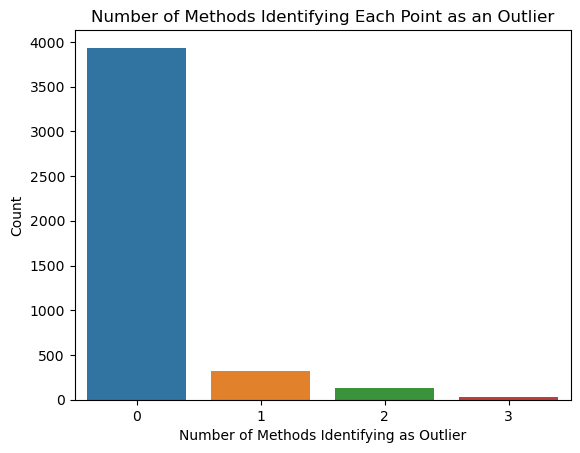

In [104]:
# ----------------------------------------------------------------
# Add Summation Column
# Detecting outliers with OCSVM
# ----------------------------------------------------------------

outlier_columns = ['Outlier_LOF', 'Outlier_IForest', 'Outlier_OCSVM']
predictors['Outlier_Sum'] = predictors[outlier_columns].apply(lambda row: sum([1 for val in row if val == -1]), axis=1)

# Displaying the first few rows of the DataFrame
print(predictors.head())

# Optional: Plotting the results
sns.countplot(x='Outlier_Sum', data=predictors)
plt.title('Number of Methods Identifying Each Point as an Outlier')
plt.xlabel('Number of Methods Identifying as Outlier')
plt.ylabel('Count')
plt.show()

In [105]:
predictors['Outlier_Sum'].value_counts()

# the total number of outliers detected by all three methods is less than 1% (~0.63%) of the data.

0    3934
1     321
2     128
3      30
Name: Outlier_Sum, dtype: int64

In [106]:
import plotly.express as px

# Using three features for the 3D plot
features_to_plot = ['Zinc_mg', 'Calcium_mg', 'Sugar_Tot_g']

predictors['Outlier_Sum_Cat'] = pd.Categorical(predictors['Outlier_Sum'])

# Create a 3D scatter plot using Plotly
fig = px.scatter_3d(predictors, x='Zinc_mg', y='Calcium_mg', z='Sugar_Tot_g', color='Outlier_Sum_Cat', 
                    title='3D Scatter Plot of Nutrition Data with Outliers Highlighted',
                    color_continuous_scale=px.colors.sequential.Viridis)

fig.show()

In [107]:
# convert to the original 'predictors' DF
predictors = predictors.drop(columns = ['Outlier_LOF', 'Outlier_IForest', 'Outlier_OCSVM','Outlier_Sum', 'Outlier_Sum_Cat'])

# <font color = darkred> Predictive modeling (classification)

In [108]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import warnings

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, r2_score

In [109]:
# Split the data into training and test sets (80% training, 20% test)

X_train, X_test, y_train, y_test = train_test_split(predictors_scaled, response, test_size=0.2, random_state=42) 

## <font color = green> KNN classification model

In [110]:
# help(KNeighborsClassifier)

In [111]:
# Suppress warning messages
warnings.filterwarnings('ignore')

# Define the KNN model
knn_model = KNeighborsClassifier()

# ---------------------------------
# Define the hyperparameter grid
# ---------------------------------
param_dist = {
    'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2],
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(knn_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1)

# Perform hyperparameter tuning
print("Training KNN...")
random_search.fit(X_train, y_train)

# Display the best parameters
best_params = random_search.best_params_
print("\nBest Parameters:", best_params)

# Train the KNN model with the best parameters
best_knn_model = KNeighborsClassifier(**best_params)
print("Hyperparameters of the Best Model:", best_knn_model.get_params())
best_knn_model.fit(X_train, y_train)

# Evaluate the model
y_pred = best_knn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

# Save all accuracy values and parameter combinations
cv_results_df = pd.DataFrame(random_search.cv_results_)
cv_results_df = cv_results_df[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']]
print("\nAll Accuracy values and parameter combinations:")
print(cv_results_df)

Training KNN...

Best Parameters: {'weights': 'distance', 'p': 1, 'n_neighbors': 4, 'algorithm': 'kd_tree'}
Hyperparameters of the Best Model: {'algorithm': 'kd_tree', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 4, 'p': 1, 'weights': 'distance'}
Accuracy Score: 0.9660249150622876

All Accuracy values and parameter combinations:
                                              params  mean_test_score  \
0  {'weights': 'distance', 'p': 1, 'n_neighbors':...         0.953824   
1  {'weights': 'uniform', 'p': 2, 'n_neighbors': ...         0.947309   
2  {'weights': 'distance', 'p': 1, 'n_neighbors':...         0.955807   
3  {'weights': 'uniform', 'p': 2, 'n_neighbors': ...         0.943626   
4  {'weights': 'uniform', 'p': 1, 'n_neighbors': ...         0.950992   
5  {'weights': 'distance', 'p': 2, 'n_neighbors':...         0.952975   
6  {'weights': 'uniform', 'p': 2, 'n_neighbors': ...         0.947025   
7  {'weights': 'distance', 'p': 1, '

In [112]:
# ------------------------------------------------------------------------
# Evaluate the model using accuracy, precision, recall, and F1 score
# ------------------------------------------------------------------------

print(classification_report(y_test, y_pred))

# Confusion Matrix
pd.crosstab(y_pred, y_test, rownames =['y_pred'], colnames = ['y_test'] )

# Overall Accuracy Score
test_accuracy = accuracy_score(y_test, y_pred)
print(f"KNN:Overall Accuracy on Test Set with best k: {test_accuracy}")


              precision    recall  f1-score   support

        High       0.98      0.96      0.97       522
         Low       0.95      0.97      0.96       361

    accuracy                           0.97       883
   macro avg       0.96      0.97      0.96       883
weighted avg       0.97      0.97      0.97       883

KNN:Overall Accuracy on Test Set with best k: 0.9660249150622876


## <font color = green> Logistic regression model

In [113]:
# Suppress warning messages
warnings.filterwarnings('ignore')

# Define the Logistic Regression model
log_reg_model = LogisticRegression()

# ---------------------------------
# Define the hyperparameter grid
# ---------------------------------
param_dist = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [50, 100, 200, 500],
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(log_reg_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1)

# Perform hyperparameter tuning
print("Training Logistic Regression...")
random_search.fit(X_train, y_train)

# Display the best parameters
best_params = random_search.best_params_
print("\nBest Parameters:", best_params)

# Train the Logistic Regression model with the best parameters
best_log_reg_model = LogisticRegression(**best_params)
print("Hyperparameters of the Best Model:", best_log_reg_model.get_params())
best_log_reg_model.fit(X_train, y_train)

# Evaluate the model
y_pred = best_log_reg_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

# Save all accuracy values and parameter combinations
cv_results_df = pd.DataFrame(random_search.cv_results_)
cv_results_df = cv_results_df[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']]
print("\nAll Accuracy values and parameter combinations:")
print(cv_results_df)


Training Logistic Regression...


/Users/trangtran/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/trangtran/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/trangtran/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/trangtran/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/trangtran/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/trangtran/anaconda3/lib/python3.11/sit


Best Parameters: {'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 500, 'C': 10}
Hyperparameters of the Best Model: {'C': 10, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 500, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Accuracy Score: 0.8969422423556059

All Accuracy values and parameter combinations:
                                              params  mean_test_score  \
0  {'solver': 'liblinear', 'penalty': 'elasticnet...              NaN   
1  {'solver': 'liblinear', 'penalty': 'none', 'ma...              NaN   
2  {'solver': 'lbfgs', 'penalty': 'l1', 'max_iter...              NaN   
3  {'solver': 'saga', 'penalty': 'l2', 'max_iter'...         0.891501   
4  {'solver': 'lbfgs', 'penalty': 'l1', 'max_iter...              NaN   
5  {'solver': 'saga', 'penalty': 'l2', 'max_iter'...         0.891785   
6  {'solver':

/Users/trangtran/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/trangtran/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/trangtran/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/trangtran/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/trangtran/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/trangtran/anaconda3/lib/python3.11/sit

In [115]:
# ------------------------------------------------------------------------
# Evaluate the model using accuracy, precision, recall, and F1 score
# ------------------------------------------------------------------------

print(classification_report(y_test, y_pred))

# Confusion Matrix
pd.crosstab(y_pred, y_test, rownames =['y_pred'], colnames = ['y_test'] )

# Overall Accuracy Score
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression: Overall Accuracy on Test Set: {test_accuracy}")

              precision    recall  f1-score   support

        High       0.93      0.89      0.91       522
         Low       0.85      0.91      0.88       361

    accuracy                           0.90       883
   macro avg       0.89      0.90      0.89       883
weighted avg       0.90      0.90      0.90       883

Logistic Regression: Overall Accuracy on Test Set: 0.8969422423556059


## <font color = green> SVM model

In [116]:
# Suppress warning messages
warnings.filterwarnings('ignore')

# Define the SVM model
svm_model = SVC()

# ---------------------------------
# Define the hyperparameter grid
# ---------------------------------
param_dist = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto'],
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(svm_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1)

# Perform hyperparameter tuning
print("Training SVM...")
random_search.fit(X_train, y_train)

# Display the best parameters
best_params = random_search.best_params_
print("\nBest Parameters:", best_params)

# Train the SVM model with the best parameters
best_svm_model = SVC(**best_params)
print("Hyperparameters of the Best Model:", best_svm_model.get_params())
best_svm_model.fit(X_train, y_train)

# Evaluate the model
y_pred = best_svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

# Save all accuracy values and parameter combinations
cv_results_df = pd.DataFrame(random_search.cv_results_)
cv_results_df = cv_results_df[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']]
print("\nAll Accuracy values and parameter combinations:")
print(cv_results_df)


Training SVM...

Best Parameters: {'kernel': 'rbf', 'gamma': 'auto', 'degree': 4, 'C': 100}
Hyperparameters of the Best Model: {'C': 100, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 4, 'gamma': 'auto', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Accuracy Score: 0.9354473386183465

All Accuracy values and parameter combinations:
                                              params  mean_test_score  \
0  {'kernel': 'rbf', 'gamma': 'auto', 'degree': 4...         0.938244   
1  {'kernel': 'poly', 'gamma': 'scale', 'degree':...         0.896884   
2  {'kernel': 'rbf', 'gamma': 'scale', 'degree': ...         0.901133   
3  {'kernel': 'linear', 'gamma': 'scale', 'degree...         0.903683   
4  {'kernel': 'rbf', 'gamma': 'scale', 'degree': ...         0.901133   
5  {'kernel': 'rbf', 'gamma': 'scale', 'degree': ...         0.911615   

In [117]:
# ------------------------------------------------------------------------
# Evaluate the model using accuracy, precision, recall, and F1 score
# ------------------------------------------------------------------------

print(classification_report(y_test, y_pred))

# Confusion Matrix
pd.crosstab(y_pred, y_test, rownames =['y_pred'], colnames = ['y_test'] )

# Overall Accuracy Score
test_accuracy = accuracy_score(y_test, y_pred)
print(f"SVM: Overall Accuracy on Test Set: {test_accuracy}")

              precision    recall  f1-score   support

        High       0.94      0.95      0.95       522
         Low       0.93      0.91      0.92       361

    accuracy                           0.94       883
   macro avg       0.93      0.93      0.93       883
weighted avg       0.94      0.94      0.94       883

SVM: Overall Accuracy on Test Set: 0.9354473386183465


## <font color = green> Random Forest model

In [118]:
# Suppress warning messages
warnings.filterwarnings('ignore')

# Define the Random Forest model
rf_model = RandomForestClassifier()

# ---------------------------------
# Define the hyperparameter grid
# ---------------------------------
param_dist = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False],
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1)

# Perform hyperparameter tuning
print("Training Random Forest...")
random_search.fit(X_train, y_train)

# Display the best parameters
best_params = random_search.best_params_
print("\nBest Parameters:", best_params)

# Train the Random Forest model with the best parameters
best_rf_model = RandomForestClassifier(**best_params)
print("Hyperparameters of the Best Model:", best_rf_model.get_params())
best_rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred = best_rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

# Save all accuracy values and parameter combinations
cv_results_df = pd.DataFrame(random_search.cv_results_)
cv_results_df = cv_results_df[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']]
print("\nAll Accuracy values and parameter combinations:")
print(cv_results_df)


Training Random Forest...

Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'criterion': 'entropy', 'bootstrap': False}
Hyperparameters of the Best Model: {'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 30, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Accuracy Score: 0.9671574178935447

All Accuracy values and parameter combinations:
                                              params  mean_test_score  \
0  {'n_estimators': 50, 'min_samples_split': 2, '...              NaN   
1  {'n_estimators': 50, 'min_samples_split': 10, ...              NaN   
2  {'n_estimators': 100, 'min_samples_split': 10,...         0.960057

In [119]:
# ------------------------------------------------------------------------
# Evaluate the model using accuracy, precision, recall, and F1 score
# ------------------------------------------------------------------------

print(classification_report(y_test, y_pred))

# Confusion Matrix
pd.crosstab(y_pred, y_test, rownames =['y_pred'], colnames = ['y_test'] )

# Overall Accuracy Score
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest: Overall Accuracy on Test Set: {test_accuracy}")

              precision    recall  f1-score   support

        High       0.97      0.97      0.97       522
         Low       0.96      0.96      0.96       361

    accuracy                           0.97       883
   macro avg       0.97      0.97      0.97       883
weighted avg       0.97      0.97      0.97       883

Random Forest: Overall Accuracy on Test Set: 0.9671574178935447


## <font color = green> Gradient Boosting Classifier model

In [120]:
# Suppress warning messages
warnings.filterwarnings('ignore')

# Define the Gradient Boosting Classifier model
gb_model = GradientBoostingClassifier()

# ---------------------------------
# Define the hyperparameter grid
# ---------------------------------
param_dist = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0],
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(gb_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1)

# Perform hyperparameter tuning
print("Training Gradient Boosting Classifier...")
random_search.fit(X_train, y_train)

# Display the best parameters
best_params = random_search.best_params_
print("\nBest Parameters:", best_params)

# Train the Gradient Boosting Classifier model with the best parameters
best_gb_model = GradientBoostingClassifier(**best_params)
print("Hyperparameters of the Best Model:", best_gb_model.get_params())
best_gb_model.fit(X_train, y_train)

# Evaluate the model
y_pred = best_gb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

# Save all accuracy values and parameter combinations
cv_results_df = pd.DataFrame(random_search.cv_results_)
cv_results_df = cv_results_df[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']]
print("\nAll Accuracy values and parameter combinations:")
print(cv_results_df)


Training Gradient Boosting Classifier...

Best Parameters: {'subsample': 0.8, 'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 10, 'learning_rate': 0.1}
Hyperparameters of the Best Model: {'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_iter_no_change': None, 'random_state': None, 'subsample': 0.8, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
Accuracy Score: 0.9682899207248018

All Accuracy values and parameter combinations:
                                              params  mean_test_score  \
0  {'subsample': 1.0, 'n_estimators': 50, 'min_sa...         0.935977   
1  {'subsample': 1.0, 'n_estimators': 100, 'min_s...         0.962040   
2  {'subsample': 0.8, 'n_estimators

In [121]:
# ------------------------------------------------------------------------
# Evaluate the model using accuracy, precision, recall, and F1 score
# ------------------------------------------------------------------------

print(classification_report(y_test, y_pred))

# Confusion Matrix
pd.crosstab(y_pred, y_test, rownames =['y_pred'], colnames = ['y_test'] )

# Overall Accuracy Score
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Gradient Boosting: Overall Accuracy on Test Set: {test_accuracy}")

              precision    recall  f1-score   support

        High       0.97      0.97      0.97       522
         Low       0.96      0.96      0.96       361

    accuracy                           0.97       883
   macro avg       0.97      0.97      0.97       883
weighted avg       0.97      0.97      0.97       883

Gradient Boosting: Overall Accuracy on Test Set: 0.9682899207248018


## <font color = green> XGBoost model

In [122]:
# XGBoost classifier expects the target variable to be numerical (either 0 and 1 for binary classification)

# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode the target variable
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)

In [123]:
# Suppress warning messages
warnings.filterwarnings('ignore')

# Define the XGBoost model
xgb_model = xgb.XGBClassifier()

# ---------------------------------
# Define the hyperparameter grid
# ---------------------------------
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 1, 5],
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=100, n_jobs=-1, return_train_score=True)

# Perform hyperparameter tuning
print("Training XGBoost Classifier...")
random_search.fit(X_train, y_train_encoded)

# Display the best parameters
best_params = random_search.best_params_
print("\nBest Parameters:", best_params)

# Train the XGBoost Classifier model with the best parameters
best_xgb_model = xgb.XGBClassifier(random_state=42, **best_params)
print("Hyperparameters of the Best Model:", best_xgb_model.get_params())
best_xgb_model.fit(X_train, y_train_encoded)

# Evaluate the model
y_pred = best_xgb_model.predict(X_test)
accuracy = accuracy_score(y_test_encoded, y_pred)
print("Accuracy Score:", accuracy)

# Save all accuracy values and parameter combinations
cv_results_df = pd.DataFrame(random_search.cv_results_)
cv_results_df = cv_results_df[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']]
print("\nAll Accuracy values and parameter combinations:")
print(cv_results_df)

Training XGBoost Classifier...

Best Parameters: {'subsample': 0.8, 'n_estimators': 50, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.2, 'gamma': 1, 'colsample_bytree': 1.0}
Hyperparameters of the Best Model: {'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 1.0, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': 1, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.2, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 5, 'max_leaves': None, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 50, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_p

In [124]:
# ------------------------------------------------------------------------
# Evaluate the model using accuracy, precision, recall, and F1 score
# ------------------------------------------------------------------------

print(classification_report(y_test_encoded, y_pred))

# Confusion Matrix
pd.crosstab(y_pred, y_test_encoded, rownames =['y_pred'], colnames = ['y_test'] )

# Overall Accuracy Score
test_accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"XGBoost: Overall Accuracy on Test Set: {test_accuracy}")

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       522
           1       0.96      0.96      0.96       361

    accuracy                           0.97       883
   macro avg       0.97      0.97      0.97       883
weighted avg       0.97      0.97      0.97       883

XGBoost: Overall Accuracy on Test Set: 0.9671574178935447


## <font color = darkblue> Variable Importance Information

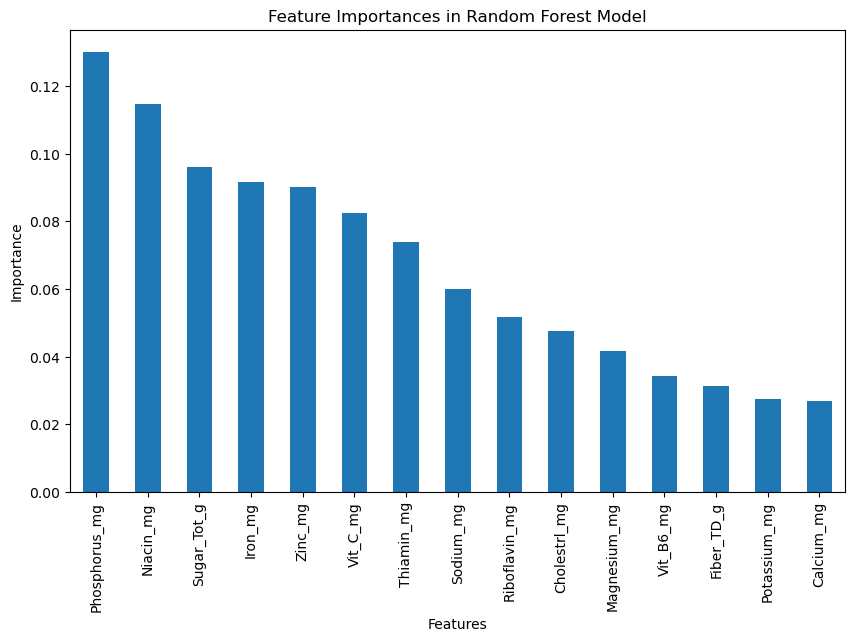

In [125]:
import matplotlib.pyplot as plt

# Extract feature importances
feature_importances = best_rf_model.feature_importances_

# Create a series with feature names and their importance
features = pd.Series(feature_importances, index = predictors.columns)

# Sort the features by importance
features = features.sort_values(ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
features.plot(kind='bar')
plt.title('Feature Importances in Random Forest Model')
plt.ylabel('Importance')
plt.xlabel('Features')

plt.show()